<a href="https://colab.research.google.com/github/AlbertFlorinus/mnistcnn/blob/active-labs/kernelvisuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b active-labs https://github.com/AlbertFlorinus/mnistcnn

Cloning into 'mnistcnn'...
remote: Enumerating objects: 7254, done.
remote: Counting objects: 100% (6054/6054), done.
remote: Compressing objects: 100% (5304/5304), done.
remote: Total 7254 (delta 777), reused 5917 (delta 688), pack-reused 1200
Receiving objects: 100% (7254/7254), 142.04 MiB | 13.38 MiB/s, done.
Resolving deltas: 100% (1087/1087), done.
Checking out files: 100% (5211/5211), done.


In [2]:
import sys
import os
%matplotlib inline
import matplotlib.pyplot as plt
from cv2 import cv2
import keras
import numpy as np
from keras.preprocessing import image
import math
from scipy import ndimage

py_file_location = "/content/mnistcnn/scripts"
sys.path.append(os.path.abspath(py_file_location))

from model_functions import Run

model = keras.models.load_model("/content/mnistcnn/ALnet-3.0.h5")

In [131]:
def kernel_plot(level, model):
    filters, biases = model.layers[level].get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters-f_min)/(f_max-f_min)

    fig = plt.figure(figsize=(20,20))
    
    columns = 4
    rows = filters.shape[-1]/4

    n_filters, ix = filters.shape[-1], 1
    for i in range(n_filters):
        f = filters[:,:,:,i]
        #f of index i is the i:th kernel of the level:th conv layer
        fig.add_subplot(rows, columns, ix)
        plt.imshow(f[:,:,0], cmap='gray')
        ix += 1
    plt.show()

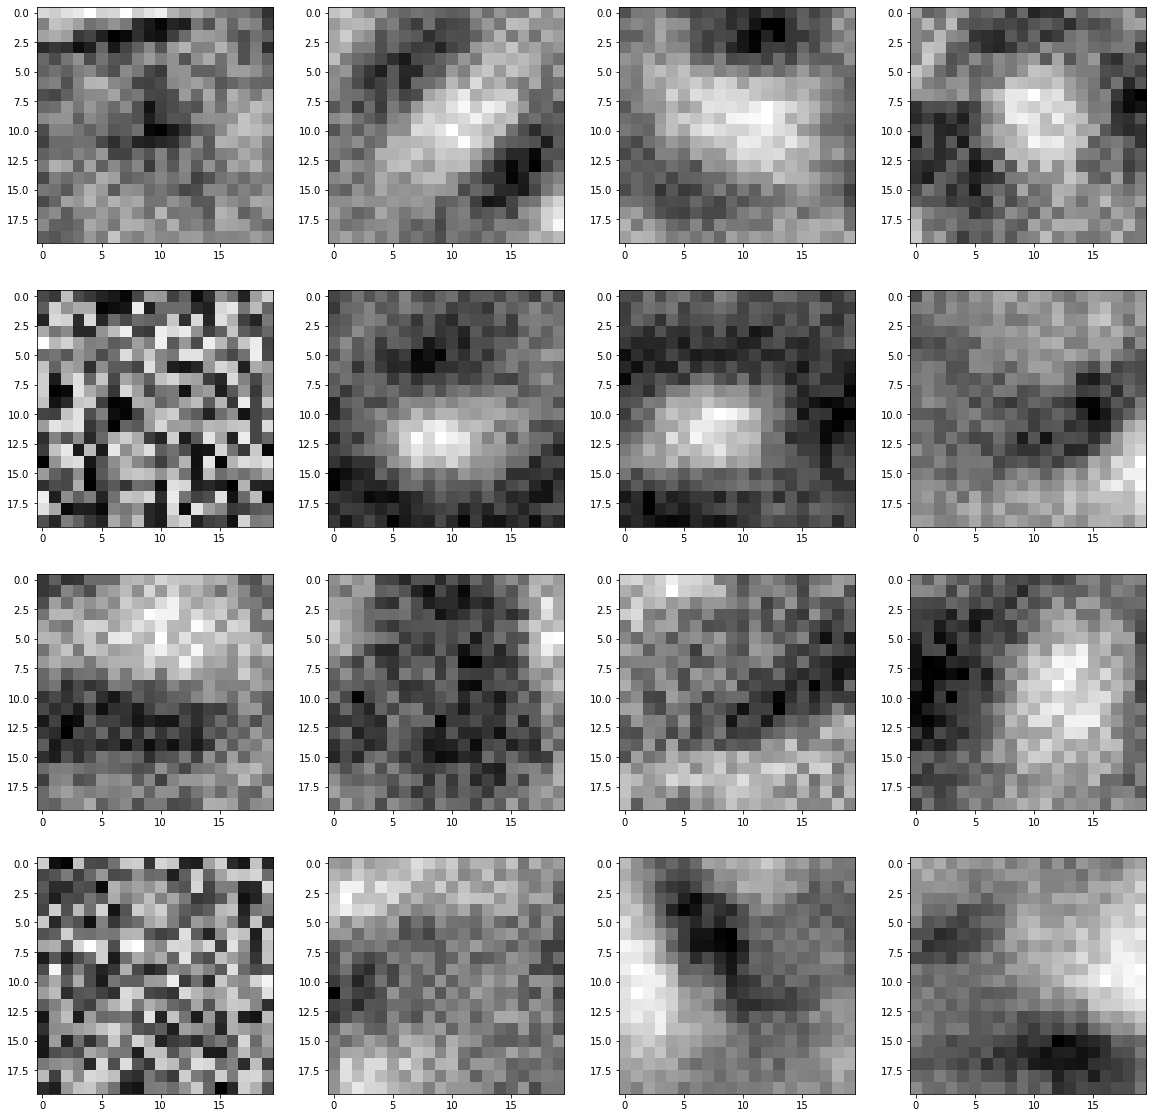

In [160]:
#plot first conv layer kernels (one input, the preprocessed image)
kernel_plot(0, model)

In [132]:
from keras import Model

In [139]:
modely = Model(inputs=model.inputs, outputs=model.layers[0].output)

In [ ]:
print(modely.summary())

In [152]:
global MODEL
MODEL = Run(model)
result = MODEL.predict_chosen("/content/mnistcnn/digits/8IMG_0369.JPG")

In [156]:
img = result["thresh_img"]
#img = result["adaptive_thresh_img"] for comparison
feature_maps = modely.predict(img)

In [150]:
def feature_plot(feature_maps):
    fig = plt.figure(figsize=(20,20))
    ix = 1
    square = 4
    for _ in range(square):
        for _ in range(square):
            fig.add_subplot(square, square, ix)
            plt.imshow(feature_maps[0,:,:,ix-1], cmap='gray')
            ix += 1
    plt.show()

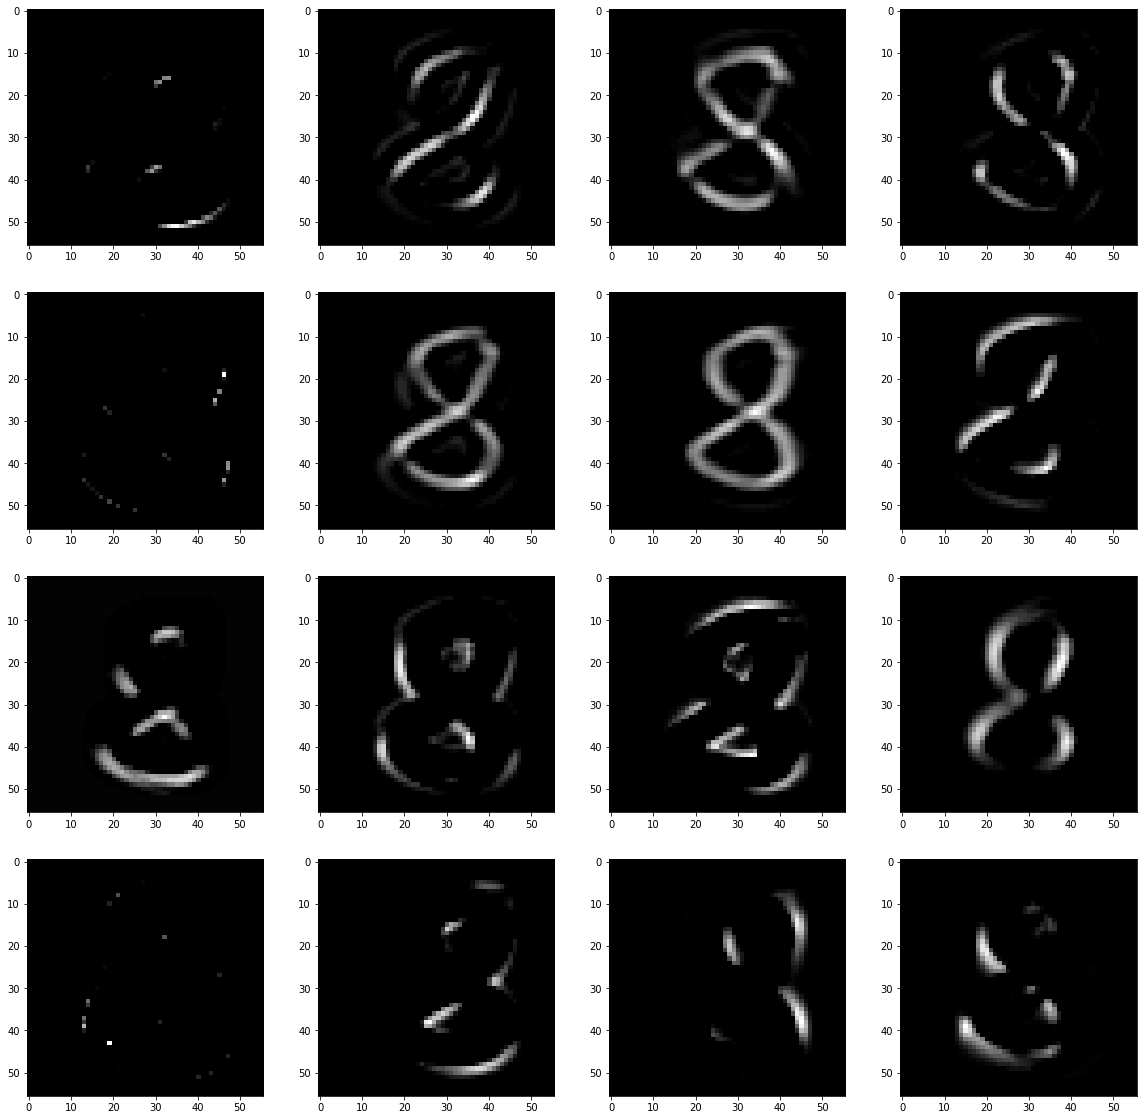

In [158]:
#plots outputs of first conv layer
feature_plot(feature_maps)